In [6]:
# Desglose de Datos Económicos: S&P 500, Desempleo y CPI

import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [7]:
# Configuración general
#plt.style.use('seaborn')
#sns.set_palette("deep")

# Configura tu clave de API de FRED
api_key = '045e43758b3197ce074ee27ba90aebe9'
base_url = "https://api.stlouisfed.org/fred/"

def get_fred_data(series_id, start_date, end_date=None):
    if end_date is None:
        end_date = datetime.now().strftime('%Y-%m-%d')
    
    url = f"{base_url}series/observations"
    params = {
        "series_id": series_id,
        "api_key": api_key,
        "file_type": "json",
        "observation_start": start_date,
        "observation_end": end_date
    }
    response = requests.get(url, params=params)
    data = response.json()
    df = pd.DataFrame(data['observations'])
    df['date'] = pd.to_datetime(df['date'])
    df['value'] = pd.to_numeric(df['value'], errors='coerce')
    return df.set_index('date')['value']


## 1. Búsqueda de datos relacionados con S&P 500

In [8]:
print("1. Búsqueda de datos relacionados con S&P 500")
print("---------------------------------------------")

url = f"{base_url}series/search"
params = {
    "search_text": "S&P",
    "api_key": api_key,
    "file_type": "json",
    "order_by": "popularity",
    "sort_order": "desc",
    "limit": 10
}
response = requests.get(url, params=params)
sp_search = pd.DataFrame(response.json()['seriess'])

print("\nEsta búsqueda muestra los 10 conjuntos de datos más populares relacionados con 'S&P' en la base de datos FRED.")
print("Incluye información sobre el título de la serie, la frecuencia de los datos, y las fechas de inicio y fin de las observaciones.")

sp_search[['title', 'frequency', 'observation_start', 'observation_end']]

1. Búsqueda de datos relacionados con S&P 500
---------------------------------------------

Esta búsqueda muestra los 10 conjuntos de datos más populares relacionados con 'S&P' en la base de datos FRED.
Incluye información sobre el título de la serie, la frecuencia de los datos, y las fechas de inicio y fin de las observaciones.


,title,frequency,observation_start,observation_end
0,ICE BofA US High Yield Index Option-Adjusted S...,"Daily, Close",1996-12-31,2024-09-11
1,S&P CoreLogic Case-Shiller U.S. National Home ...,Monthly,1987-01-01,2024-06-01
2,S&P 500,"Daily, Close",2014-09-12,2024-09-11
3,Real Median Household Income in the United States,Annual,1984-01-01,2023-01-01
4,ICE BofA US High Yield Index Effective Yield,"Daily, Close",1996-12-31,2024-09-11
5,ICE BofA US Corporate Index Option-Adjusted Sp...,"Daily, Close",1996-12-31,2024-09-11
6,S&P CoreLogic Case-Shiller U.S. National Home ...,Monthly,1987-01-01,2024-06-01
7,Dow Jones Industrial Average,"Daily, Close",2014-09-12,2024-09-11
8,Median Household Income in the United States,Annual,1984-01-01,2023-01-01
9,ICE BofA Euro High Yield Index Effective Yield,"Daily, Close",1997-12-31,2024-09-11


## 2. Gráfico de desempleo por raza


2. Gráfico de desempleo por raza
--------------------------------


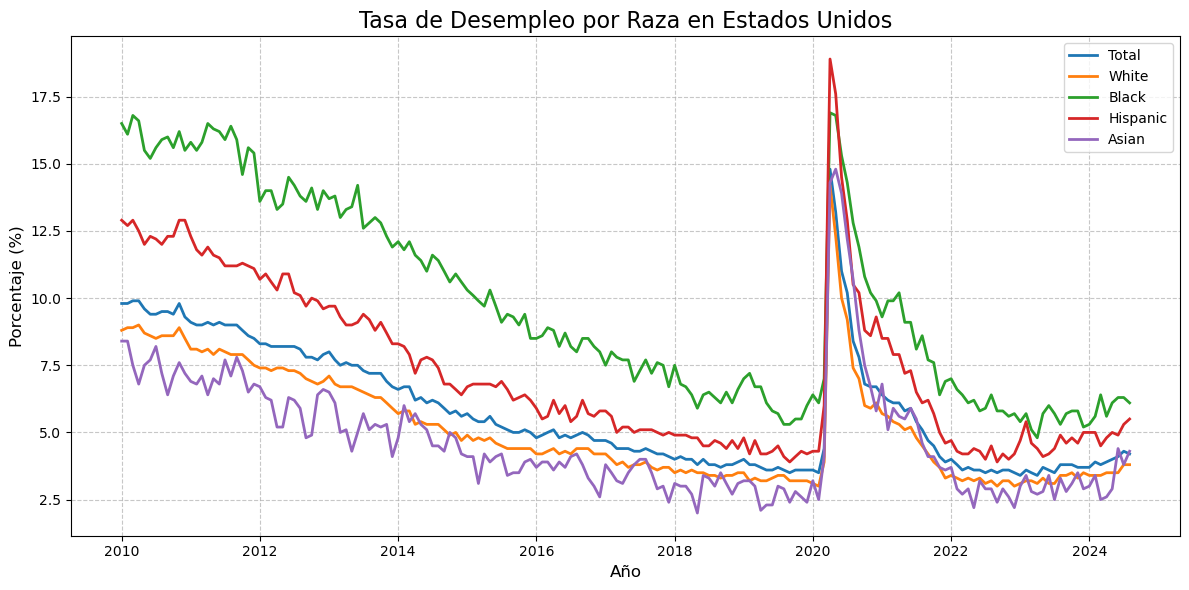


Este gráfico muestra la evolución de las tasas de desempleo para diferentes grupos raciales en Estados Unidos desde 2010.
Observaciones clave:
- La tasa de desempleo general ha disminuido significativamente desde 2010.
- Existen disparidades persistentes entre los grupos raciales, con tasas más altas para la población negra e hispana.
- La población asiática tiende a tener tasas de desempleo más bajas, pero con mayor volatilidad.


In [9]:
print("\n2. Gráfico de desempleo por raza")
print("--------------------------------")

tickersfred = ['UNRATE', 'LNS14000003', 'LNS14000006', 'LNS14000009', 'LNU04032183']
race_labels = ['Total', 'White', 'Black', 'Hispanic', 'Asian']

unemployment_data = pd.DataFrame()
for ticker in tickersfred:
    unemployment_data[ticker] = get_fred_data(ticker, '2010-01-01')

unemployment_data.columns = race_labels

plt.figure(figsize=(12, 6))
for column in unemployment_data.columns:
    plt.plot(unemployment_data.index, unemployment_data[column], lw=2, label=column)

plt.title('Tasa de Desempleo por Raza en Estados Unidos', fontsize=16)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xlabel('Año', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nEste gráfico muestra la evolución de las tasas de desempleo para diferentes grupos raciales en Estados Unidos desde 2010.")
print("Observaciones clave:")
print("- La tasa de desempleo general ha disminuido significativamente desde 2010.")
print("- Existen disparidades persistentes entre los grupos raciales, con tasas más altas para la población negra e hispana.")
print("- La población asiática tiende a tener tasas de desempleo más bajas, pero con mayor volatilidad.")

## 3. Gráfico del CPI por sectores


3. Gráfico del Índice de Precios al Consumidor (CPI) por sectores
---------------------------------------------------------------


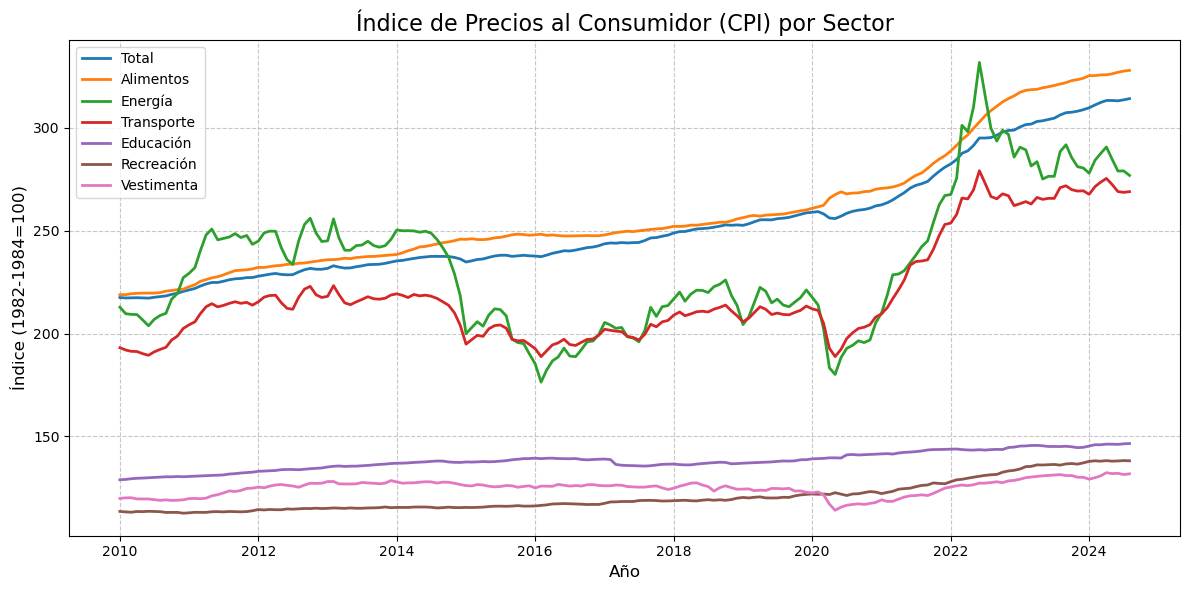


Este gráfico muestra la evolución del Índice de Precios al Consumidor (CPI) para diferentes sectores desde 2010.
Observaciones clave:
- El CPI general (línea 'Total') muestra una tendencia ascendente constante, indicando inflación.
- Los precios de la energía y el transporte muestran mayor volatilidad.
- Los costos de educación han aumentado más rápidamente que el promedio general.
- Los precios de la vestimenta han permanecido relativamente estables en comparación con otros sectores.


In [5]:
print("\n3. Gráfico del Índice de Precios al Consumidor (CPI) por sectores")
print("---------------------------------------------------------------")

tickers_cpi = ['CPIAUCSL', 'CPIFABSL', 'CPIENGSL', 'CPITRNSL', 'CPIEDUSL', 'CPIRECSL', 'CPIAPPSL']
sectors = ['Total', 'Alimentos', 'Energía', 'Transporte', 'Educación', 'Recreación', 'Vestimenta']

cpi_data = pd.DataFrame()
for ticker in tickers_cpi:
    cpi_data[ticker] = get_fred_data(ticker, '2010-01-01')

plt.figure(figsize=(12, 6))
for ticker, sector in zip(tickers_cpi, sectors):
    plt.plot(cpi_data.index, cpi_data[ticker], lw=2, label=sector)

plt.title('Índice de Precios al Consumidor (CPI) por Sector', fontsize=16)
plt.ylabel('Índice (1982-1984=100)', fontsize=12)
plt.xlabel('Año', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nEste gráfico muestra la evolución del Índice de Precios al Consumidor (CPI) para diferentes sectores desde 2010.")
print("Observaciones clave:")
print("- El CPI general (línea 'Total') muestra una tendencia ascendente constante, indicando inflación.")
print("- Los precios de la energía y el transporte muestran mayor volatilidad.")
print("- Los costos de educación han aumentado más rápidamente que el promedio general.")
print("- Los precios de la vestimenta han permanecido relativamente estables en comparación con otros sectores.")